In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from keras import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split

import pywt
import pywt.data

### CIFAR 10


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']
train_images.shape

(50000, 32, 32, 3)

In [4]:
train_images_grayscale = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in train_images])
test_images_grayscale = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in test_images])

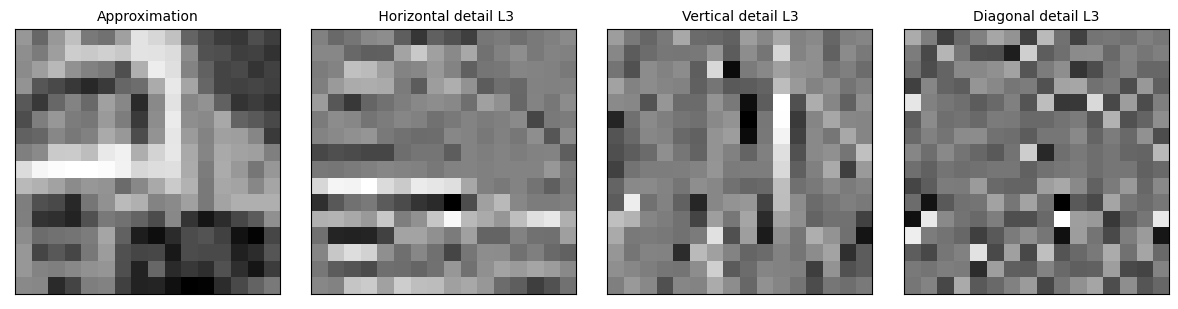

In [6]:
titles = [  'Approximation', ' Horizontal detail L3',
            'Vertical detail L3', 'Diagonal detail L3',
            ' Horizontal detail L2','Vertical detail L2',
            'Diagonal detail L2', ' Horizontal detail L1',
            'Vertical detail L1','Diagonal detail L1']

db1= pywt.dwt2(train_images_grayscale[1], 'db1')
LL, (LH, HL, HH) = db1
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL,LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()



In [7]:
len(train_images_grayscale)

50000

In [8]:
train_images_dwt2 = np.empty(shape=(50000,16,16))
test_images_dwt2 = np.empty(shape=(10000,16,16))

for i in range(len(train_images_grayscale)):
    db4 = pywt.dwt2(train_images_grayscale[i], 'db1')
    LL, (LH, HL, HH) = db4
    train_images_dwt2[i] = LL

for i in range(len(test_images_grayscale)):
    db4 = pywt.dwt2(test_images_grayscale[i], 'db1')
    LL, (LH, HL, HH) = db4
    test_images_dwt2[i] = LL

In [9]:
xTrain = np.reshape(train_images_dwt2, (train_images_dwt2.shape[0], -1))
xTest= np.reshape(test_images_dwt2, (test_images_dwt2.shape[0], -1))

xTrain_org = np.reshape(train_images_grayscale, (train_images_grayscale.shape[0], -1))
xTest_org = np.reshape(test_images_grayscale, (test_images_grayscale.shape[0], -1))
yTrain = train_labels.flatten()
yTest = test_labels.flatten()

In [10]:
from sklearn.naive_bayes import GaussianNB #NaiveBayes
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis #LDA, QDA
from sklearn.neighbors import NearestCentroid #NM
from sklearn.neighbors import KNeighborsClassifier #kNN
from sklearn.svm import SVC #SVM

In [11]:
classifiers = [
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    NearestCentroid(),
    KNeighborsClassifier(n_neighbors=1),
    KNeighborsClassifier(n_neighbors=3, algorithm='brute'),
    KNeighborsClassifier(n_neighbors=5),
    KNeighborsClassifier(n_neighbors=7),
    KNeighborsClassifier(n_neighbors=21),
    # SVC()  
]


In [12]:
def train_test(name, sample, data,label):

    X_train, X_test, y_train, y_test = train_test_split(
        data, label, test_size=sample, shuffle=True
    )
    name.fit(X_train,y_train)
    predicted = name.predict(X_test)

    return predicted, X_test, y_test

In [13]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = train_test(i,test_sample, xTest, yTest)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.26594999999999996
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.268125
Model:  NearestCentroid()
Średnia dokłądności:  0.2538250000000001
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.25572500000000004
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.24102499999999996
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.25559999999999994
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.2579
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.259125


In [14]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = train_test(i,test_sample, xTest, yTest)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.27105000000000007
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.2699
Model:  NearestCentroid()
Średnia dokłądności:  0.250675
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.25329999999999997
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.24207499999999998
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.25112500000000004
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.2561
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.26209999999999994


In [15]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = train_test(i,test_sample, xTest_org, yTest)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.27054999999999996
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.21152500000000002
Model:  NearestCentroid()
Średnia dokłądności:  0.25272500000000003
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.242825
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.23325
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.24245
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.24907500000000002
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.2434


Model:  GaussianNB()
Model:  LinearDiscriminantAnalysis()
Model:  NearestCentroid()
Model:  KNeighborsClassifier(n_neighbors=1)
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Model:  KNeighborsClassifier()
Model:  KNeighborsClassifier(n_neighbors=7)
Model:  KNeighborsClassifier(n_neighbors=21)


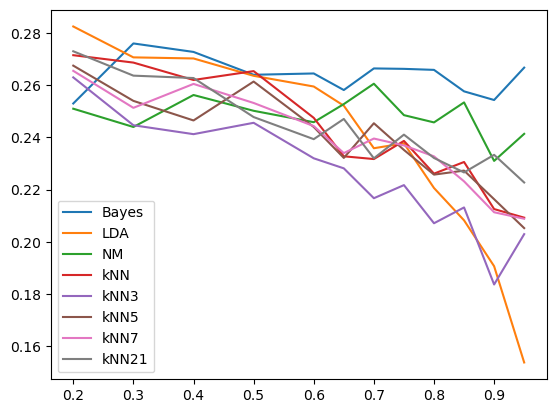

In [16]:
test_sample = [0.2,0.3,0.4,0.5,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]

for i in classifiers:
    print('Model: ',i)
    accPoints = []
    acc = 0
    for j in test_sample:
        model = i
        predicted, X_test, y_test = train_test(i,j, xTest, yTest)
        acc = metrics.accuracy_score(y_test, predicted)
        # print('Dokładność dla próbki: ',j,'wynosi: ',acc)
        accPoints.append(acc)
    plt.plot(test_sample, accPoints)
    plt.grid()
    plt.legend(['Bayes','LDA','NM','kNN','kNN3','kNN5','kNN7','kNN21'])

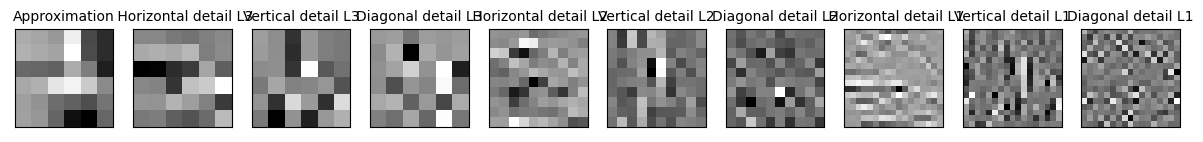

(6, 6)

In [17]:
db2 = pywt.wavedec2(train_images_grayscale[1], 'db2')
LL3,(LH3, HL3, HH3),(LH2, HL2, HH2) , (LH, HL, HH) = db2
fig = plt.figure(figsize=(12, 10))
for i, a in enumerate([LL3, LH3, HL3, HH3,LH2, HL2, HH2,LH, HL, HH]):
    ax = fig.add_subplot(1, 10, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

new_train_im = []

LH3.shape

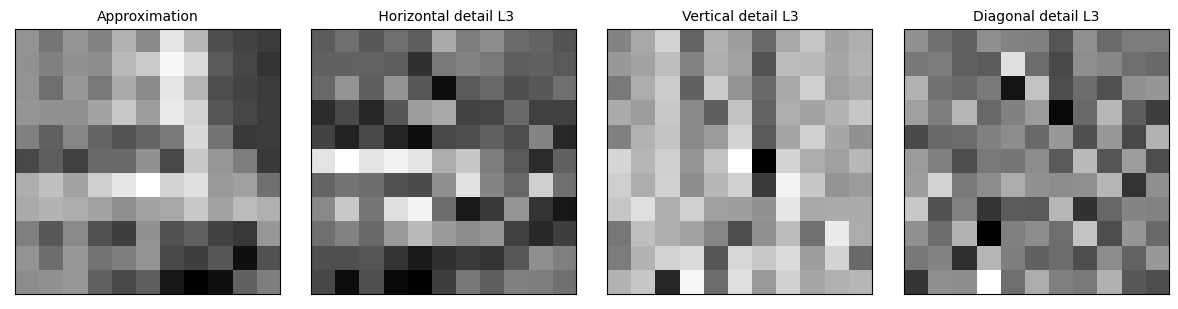

(11, 11)

In [18]:
db3 = pywt.wavedec2(train_images_grayscale[1], 'db3')
LL2,(LH2, HL2, HH2) , (LH, HL, HH) = db3
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL2,LH2, HL2, HH2]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

new_train_im = []
LL2.shape

### Test

In [19]:
test_sample = 0.4
xTrain_orgrgb = np.reshape(train_images, (train_images.shape[0], -1))

xTrain_orgrgb.shape


(50000, 3072)

In [ ]:
for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted = train_test(i, xTrain_org, xTest_org)
      sumAcc += metrics.accuracy_score(yTest, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)